Importing Libraries

In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Define dataset directory and parameters

In [4]:
dataset_dir = r"C:\Users\User\Documents\AITR Indore\6th Semester\Machine Learning\ANN\Covid19-dataset"
img_height, img_width = 128, 128
batch_size = 32

Load and preprocess data

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 254 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


Define ANN architecture

In [7]:
model = models.Sequential([
    layers.Flatten(input_shape=(img_height, img_width, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the model

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model

In [17]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=None  # Automatically calculate validation steps
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.9619 - loss: 0.1396 - val_accuracy: 0.8095 - val_loss: 0.8852
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9062 - loss: 0.1704 - val_accuracy: 0.7937 - val_loss: 0.8476
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - accuracy: 0.9259 - loss: 0.1989 - val_accuracy: 0.7619 - val_loss: 0.6747
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9688 - loss: 0.1819 - val_accuracy: 0.7778 - val_loss: 0.7143
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.9684 - loss: 0.1202 - val_accuracy: 0.8095 - val_loss: 0.9307
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.8750 - loss: 0.4165 - val_accuracy: 0.7937 - val_loss: 0.8173
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.9874 - loss: 0.0915 - val_accuracy: 0.7778 - val_loss: 0.7072
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.9688 - loss: 0.1158 - val_accuracy: 0.7460 - val_loss:

Evaluate the model

In [18]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.7158 - loss: 0.7802
Test accuracy: 0.7142857313156128


Plot training history

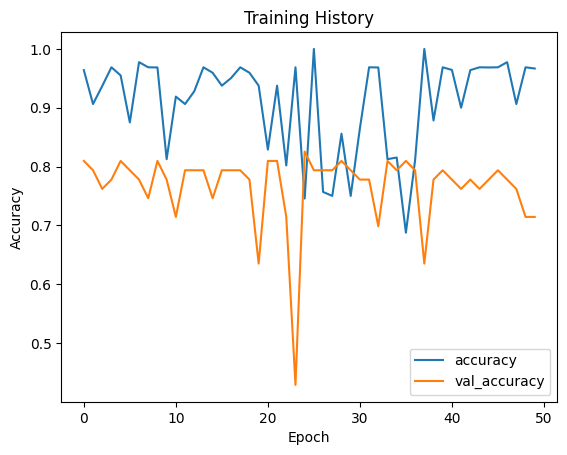

In [28]:
plt.title('Training History')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Plot ROC curve

In [23]:
y_pred = model.predict(validation_generator)
fpr, tpr, thresholds = roc_curve(validation_generator.classes, y_pred)
roc_auc = auc(fpr, tpr)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 439ms/step


Print AUC Score

In [27]:
print("AUC Score:", roc_auc)

AUC Score: 0.3892307692307692


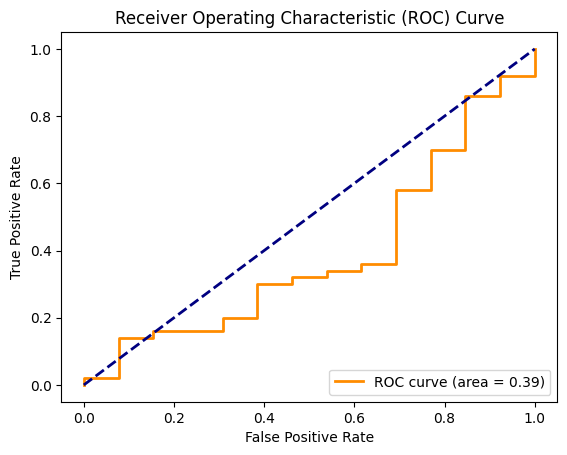

In [24]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix

In [25]:
y_true = validation_generator.classes
y_pred_classes = np.argmax(y_pred, axis=-1)
cm = confusion_matrix(y_true, y_pred_classes)

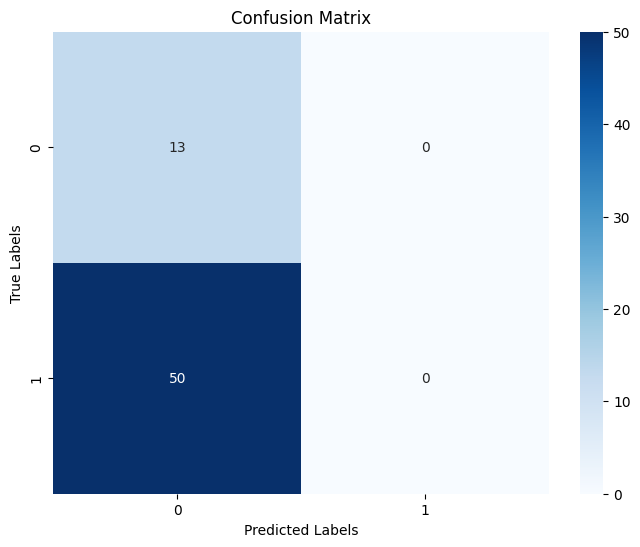

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()